In [1]:
import pandas as pd
import numpy as np
import ast
import collections as c
import matplotlib.pyplot as plt
import scipy.stats as st

%matplotlib inline

In [2]:
convs=pd.read_csv('../data/bbAllFullConvosMoreAWCorrectTimeZone.csv',sep=';')

/home/mako0970/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (38,39,42,43,46,47,50,51,54,55,58,59,62,63,66,67,70,71,74,75,78,79,82,83,86,87,90,91,94,95,98,99,102,103,106,107,110,111,114,115,118,119,122,123,126,127,130,131,134,135,138,139,142,143,146,147,150,151,154,155,158,159,162,163,166,167,170,171,183) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(convs)

5350

In [4]:
convs.allNames=convs.allNames.apply(lambda x: ast.literal_eval(x))

In [5]:
allUsers=list(set(convs.allNames.sum()))

In [6]:
len(allUsers)

2765

So 2765 unique users participated in our local conversations

In [7]:
np.savetxt('../data/bbFinalConvoUsers.txt',allUsers,fmt='%s',delimiter=',')

In [8]:
before=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-15 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-10-25 00:00:00'))]

In [9]:
during=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-25 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-04 00:00:00'))]

In [10]:
after=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-04 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-14 00:00:00'))]

In [11]:
lafter=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-14 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-24 00:00:00'))]

In [12]:
bUsers=list(set(before.allNames.sum()))

In [13]:
len(bUsers)

791

In [14]:
dUsers=list(set(during.allNames.sum()))

In [15]:
len(dUsers)

1772

In [16]:
aUsers=list(set(after.allNames.sum()))

In [17]:
len(aUsers)

1216

In [18]:
laUsers=list(set(lafter.allNames.sum()))

In [19]:
len(laUsers)

863

In [20]:
len(set(bUsers) & set(dUsers))

472

In [21]:
len(set(bUsers) & set(aUsers))

364

In [22]:
len(set(bUsers) & set(laUsers))

294

In [23]:
len(set(dUsers) & set(aUsers))

693

In [24]:
len(set(dUsers) & set(laUsers))

490

In [25]:
len(set(aUsers) & set(laUsers))

467

In [26]:
len(set(dUsers) & set(aUsers) & set(bUsers) & set(laUsers))

178

* So more than a half of before users were also active during and about hald in after
* And about 40% of during users were active after and almost 30% lafter
* Over 150 users were active in all four periods

# Patterns by users

### One-person conversations

In [27]:
len(convs[convs.userSetLen==1])/float(len(convs))

0.24990654205607477

Quarter of all conversations are users responding to themselves!!!

In [28]:
np.median(convs.convSize[convs.userSetLen==1])

2.0

In [29]:
np.percentile(convs.convSize[convs.userSetLen==1],90)

2.0

In [30]:
max(convs.convSize[convs.userSetLen==1])

12

In [31]:
convs[(convs.userSetLen==1) & (convs.convSize==12)] # add .values to see as list

,tweet0,date0,username0,text0,tweet1,date1,username1,text1,tweet2,date2,...,text43,branching,convSize,allNames,convoEndTime,convoLen,userSetLen,avgTimePerReply,longTailed,medianReplyTime
72,269602947242029056,2012-11-16 19:48:46,anthonyd1972,0,269603217615233026,2012-11-16 19:49:50,anthonyd1972,@anthonyd1972 so if the CIA talking points wer...,269603536260706304,2012-11-16 19:51:06,...,0,True,12,[anthonyd1972],2012-11-16 19:56:09,443,1,40.272727,True,81


So the vast majority of these (90%) are one reply to oneself, but there is a self-conversation of 12 steps (rant about politics)

In [32]:
np.median(convs.convoLen[convs.userSetLen==1])

234.0

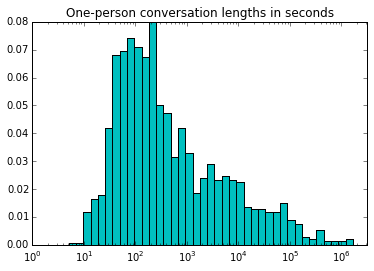

In [33]:
convoLen = convs.convoLen[convs.userSetLen==1].dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('One-person conversation lengths in seconds')

In [34]:
np.median(convs.avgTimePerReply[convs.userSetLen==1])

223.0

In [35]:
np.median(convs.medianReplyTime[convs.userSetLen==1])

226.0

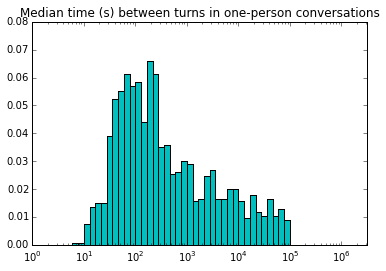

In [36]:
medRepTime=convs[convs.userSetLen==1].medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in one-person conversations')

** Takeway:**
* So the conversations users have with themselves tend to be quite a bit shorter than all the conversations
* While the number of tweets still has median of 2.0 and 90th percentile of 2 as well
* The avg and median gaps between replies in the conversation are much shorter than overall
* Pretty intuitive, since they don't have to wait for another party for a reply - no back and forth

### Two-person conversations

In [37]:
len(convs[convs.userSetLen==2])/float(len(convs))

0.7332710280373832

Almost three quarters of the conversations are with just one other person

In [38]:
np.median(convs.convSize[convs.userSetLen==2])

2.0

In [39]:
np.percentile(convs.convSize[convs.userSetLen==2],90)

4.0

In [40]:
max(convs.convSize[convs.userSetLen==2])

43

In [41]:
convs[(convs.userSetLen==2) & (convs.convSize==43)].values

array([[261901117695332352, '2012-10-26 14:44:27', 'Megglezzz', 0,
        261904642399686657, '2012-10-26 14:58:27', 'DDougyy',
        '@Megglezzz I read that as "greasy monkeys" instead of greedy. Also thought we could lose some humor with the latest news.',
        261904999309791232, '2012-10-26 14:59:52', 'Megglezzz',
        '@DDougyy greasy monkeys huh? Yeah that could work too. But this seriously makes me ashamed to call myself a fan.',
        261908598827917312, '2012-10-26 15:14:10', 'DDougyy',
        "@Megglezzz I know, right? It's kind off embarrassing.",
        261909742300053504, '2012-10-26 15:18:43', 'Megglezzz',
        '@DDougyy and they wonder why no one respects the sport',
        261911804198936578, '2012-10-26 15:26:54', 'DDougyy',
        '@Megglezzz Yep, I hear ya. :(', 261912049620246528,
        '2012-10-26 15:27:53', 'Megglezzz',
        "@DDougyy they wouldn't be allowed in the cool kids club. Nope. Lol",
        261915793703460864, '2012-10-26 15:42:46

* The median suggests that about half of these are still just one tweet and one reply - short exchanges
* The 90th percentile being 4 suggests that bigger proportion of these are longer than in one-person conversations
* The longest convo here is 43 steps - hockey and Dr. WHO, with concerns about Sandy and preparation at the end
* The 3 out of 4 two-person conversations with 12 tweets are about Sandy in some way: evacuation, prep, infrustricture failure, role of global warming

In [42]:
np.median(convs.convoLen[convs.userSetLen==2])

964.0

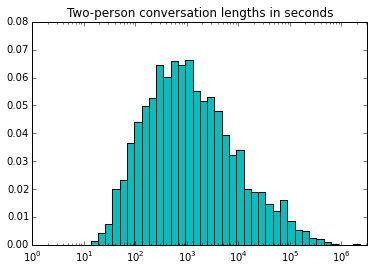

In [43]:
convoLen = convs.convoLen[convs.userSetLen==2].dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Two-person conversation lengths in seconds')

In [44]:
np.median(convs.avgTimePerReply[convs.userSetLen==2])

592.0

In [46]:
np.median(convs.medianReplyTime[convs.userSetLen==2].dropna())

515.0

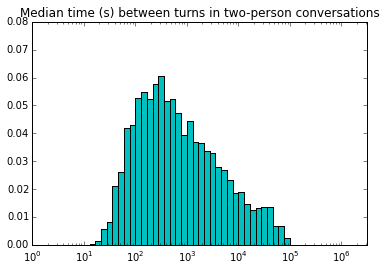

In [47]:
medRepTime=convs[convs.userSetLen==2].medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in two-person conversations')

** Takeway:**
* The two-person conversations are longer than overall (median)
* And much longer than one-person conversations
* The median number of steps is still 2, but 90th percentile is now 4 -  bigger proportion of these are longer than in one-person conversations
* In addition, the breaks between tweets are longer than overall (438s) and definitely one-person conversations
* **Difference between monolog and dialiog/ personal and social**

### More-than-two person conversations

In [48]:
len(convs[convs.userSetLen>2])/float(len(convs))

0.016822429906542057

Only **1.7%** of the conversations are with more than two people

In [49]:
np.median(convs.convSize[convs.userSetLen>2])

4.0

In [50]:
np.percentile(convs.convSize[convs.userSetLen>2],90)

6.1000000000000085

In [51]:
max(convs.convSize[convs.userSetLen>2])

11

In [52]:
convs[(convs.userSetLen>2) & (convs.convSize==11)].values

array([[264477309006925826, '2012-11-02 17:21:18', 'NYCMayorsOffice', 0,
        264477517690306562, '2012-11-02 17:22:08', 'ThomasSickler',
        '@NYCMayorsOffice THANK YOU! THANK GOD ITS CANCELED #NYCMarathon',
        264486296720916481, '2012-11-02 17:57:01', 'CG_DarkAngel',
        "@NYCMayorsOffice @MikeBloomberg Thank you for canceling NYC's marathon.  It was the right move.  #fb",
        264570354259865600, '2012-11-02 23:31:02', 'PaulyFook',
        '@NYCMayorsOffice Waiting for the Mayor to take responsibility as to why it was canceled so late. No excuses.',
        264484676402552832, '2012-11-02 17:50:35', 'emburkh',
        '@NYCMayorsOffice @NYCService maybe the runners can #volunteer instead!',
        264482738990632960, '2012-11-02 17:42:53', 'FlemingPhD',
        "@NYCMayorsOffice : Thank God.  Good decision.  We are proud of your wisdom in correcting course and focusing resources on Sandy's victims.",
        264511213189357568, '2012-11-02 19:36:02', 'Cowwgurl',

* The median length of these conversations is 4 and the 90th percentile is 6
* This suggests that these are, on average, longer conversations than overall than overall and one- and two-person convos
* The longest convo here is 12 steps - discussion of NYC marathon being cancelled

In [53]:
np.median(convs.convoLen[convs.userSetLen>2])

1287.0

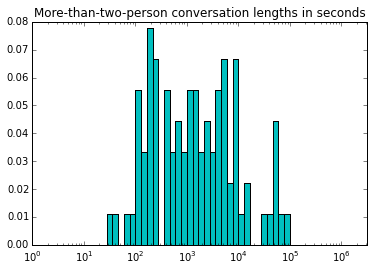

In [54]:
convoLen = convs.convoLen[convs.userSetLen>2].dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('More-than-two-person conversation lengths in seconds')

The number of these conversations is too small for a clear distribution at this resolution (100 bars)

In [55]:
np.median(convs.avgTimePerReply[convs.userSetLen>2])

442.39999999999998

In [56]:
np.median(convs.medianReplyTime[convs.userSetLen>2])

769.75

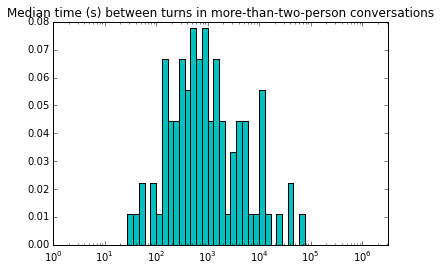

In [57]:
medRepTime=convs[convs.userSetLen>2].medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in more-than-two-person conversations')

** Takeway:**
* The more-than-two-person conversations are longer than overall (median)
* And much longer than one-person and two-person conversations
* The number of tweets in these conversations are higher than overall and others (median=4, 90th=6)
* But the breaks between tweets are the same as overall and slightly longer than two-person (**CHECK FOR SIG**)
* **As long as it's a dialog/social, more or less the same tempo of conversation is kept**

In [58]:
st.kruskal(convs.convoLen[convs.userSetLen==1],convs.convoLen[convs.userSetLen==2],convs.convoLen[convs.userSetLen>2])

(261.29750283610917, 1.8195675857383543e-57)

In [59]:
st.ranksums(convs.convoLen[convs.userSetLen==1],convs.convoLen[convs.userSetLen==2])

(-16.036491784360599, 7.105658276418664e-58)

In [60]:
st.ranksums(convs.convoLen[convs.userSetLen==2],convs.convoLen[convs.userSetLen>2])

(-0.97442178500187115, 0.32984715710032297)

In [61]:
st.ranksums(convs.convoLen[convs.userSetLen==1],convs.convoLen[convs.userSetLen>2])

(-5.3894193327922473, 7.0685698911143446e-08)

In [62]:
st.kruskal(convs.medianReplyTime[convs.userSetLen==1],convs.medianReplyTime[convs.userSetLen==2],convs.medianReplyTime[convs.userSetLen>2])

(117.09868197504571, 3.7354617183760697e-26)

In [63]:
st.ranksums(convs.medianReplyTime[convs.userSetLen==1],convs.medianReplyTime[convs.userSetLen==2])

(-10.506245284491181, 8.0848606560395855e-26)

In [64]:
st.ranksums(convs.medianReplyTime[convs.userSetLen==2],convs.medianReplyTime[convs.userSetLen>2])

(-1.9162232836084296, 0.055336680908316872)

In [65]:
st.ranksums(convs.medianReplyTime[convs.userSetLen==1],convs.medianReplyTime[convs.userSetLen>2])

(-4.6748469156170867, 2.9417296955665248e-06)

# Conversation types (# users) across time stages

In [66]:
len(before)/float(len(before)+len(during)+len(after)+len(lafter))

0.15584169664836206

In [67]:
len(during)/float(len(before)+len(during)+len(after)+len(lafter))

0.39954554061730735

In [68]:
len(after)/float(len(before)+len(during)+len(after)+len(lafter))

0.2685097519409203

In [69]:
len(lafter)/float(len(before)+len(during)+len(after)+len(lafter))

0.17610301079341034

**Summary**
* 16% of conversations happen Before
* 40% During
* 27% After
* and 18% Long After
Check if these percentages hold for different types of conversations or if they over/underrepresented in certain periods

### Frequency of one-person convos across periods

In [70]:
len(before[before.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.18773373223635004

In [71]:
len(during[during.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.30740463724756917

In [72]:
len(after[after.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.29020194465220644

In [73]:
len(lafter[lafter.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.19596110695587135

In [74]:
len(before[before.userSetLen==1])/float(len(before))

0.30498177399756987

In [75]:
len(during[during.userSetLen==1])/float(len(during))

0.19478672985781992

In [76]:
len(after[after.userSetLen==1])/float(len(after))

0.2736248236953456

In [77]:
len(lafter[lafter.userSetLen==1])/float(len(lafter))

0.2817204301075269

**Takeaway:**
* One-person conversations seem to be underrepresented (sligtly) During
* They are a bit overrepresented everywhere else
* CHECK CHI-SQUARE

### Frequency of two-person convos across periods

In [78]:
len(before[before.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.14427733877134846

In [79]:
len(during[during.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.4198317614070864

In [80]:
len(after[after.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.2574560285495794

In [81]:
len(lafter[lafter.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.16772877899566657

In [82]:
len(before[before.userSetLen==2])/float(len(before))

0.6877278250303767

In [83]:
len(during[during.userSetLen==2])/float(len(during))

0.7805687203791469

In [84]:
len(after[after.userSetLen==2])/float(len(after))

0.7122708039492243

In [85]:
len(lafter[lafter.userSetLen==2])/float(len(lafter))

0.7075268817204301

**Takeaway:**
* The two-person conversations seem to be under-represented in After
* And a tiny bit underrepresented in Before and Long After
* And a tiny bit overrepresented in During
* CHECK CHI-SQUARE

### Frequency of more-than-two-person convos across periods

In [86]:
len(before[before.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.06666666666666667

In [87]:
len(during[during.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.5777777777777777

In [88]:
len(after[after.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.2222222222222222

In [89]:
len(lafter[lafter.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.1111111111111111

In [90]:
len(before[before.userSetLen>2])/float(len(before))

0.007290400972053463

In [91]:
len(during[during.userSetLen>2])/float(len(during))

0.024644549763033177

In [92]:
len(after[after.userSetLen>2])/float(len(after))

0.014104372355430184

In [93]:
len(lafter[lafter.userSetLen>2])/float(len(lafter))

0.010752688172043012

**Takeway:**
* While there are only 88 more-than-two-person conversations altogether
* It seems that they are highly concentrated in the During period
* About 58% of them are in this period
* Every other period has these underrepresented, but especially Before
* CHECK CHI-SQUARE

## Analysis by User features

Supplement the data with other user-level information from the data frame

In [94]:
sup=pd.read_csv('../data/bbContextOntopicRepliesBothSidesDF.csv',sep=';')

In [95]:
sup.columns

Index([u'id', u'username', u'user_id', u'geo_enabled', u'followCount',
       u'friendCount', u'faveCount', u'tweetCount', u'date', u'timing',
       u'coordinates', u'location', u'source', u'retweetCount', u'isRetweet',
       u'origTweet', u'origUser', u'origTime', u'origPlace',
       u'origUserCreated', u'contributors', u'hashtags', u'has_media', u'urls',
       u'mentions', u'replyWho', u'replyWhat', u'text', u'date_obj'],
      dtype='object')

* The biggest number of users in a single convo is 11 - replies to Bloomberg cancelling the marathon
* The next largest number of users in a conversation is 5 - start there

In [96]:
#make new columns for the unique conversation participants (up to 5)
for i in xrange(5):
    userCol='convoUser'+str(i)
    convs[userCol]=convs.allNames.apply(lambda x: x[i] if len(x)>i else 0)

Imprtant aside:
* People's friends and follower's nerwork change
* They also change size over the time periods we are studying
* For this purpose of classifying conversations by users, we can pick the earliest
* To signify what kind of user they were going into the event
* Later we can also look at users whose follower and other counts changed dramatically
* It's hard to trust this data as it seems to fluctuate back and forth pretty randomly
* There seem to be **glitches** in the counts around the time of the event - most of them come back to normal afterwards

In [ ]:
for i in xrange(5):
    userCol='convoUser'+str(i)
    followCol='followersUser'+str(i)
    friendCol='friendsUser'+str(i)
    faveCol='favesUser'+str(i)
    tweetCount='tweetCountUser'+str(i)
    convs[followCol]=0
    convs[friendCol]=0
    convs[faveCol]=0
    convs[tweetCount]=0
    #temp=pd.merge(left=convs, right=sup[['username','followCount','friendCount','faveCount','tweetCount']],how='left', left_on=userCol, right_on='username')
    #convs[[followCol,friendCol,faveCol,tweetCount]]=temp[['followCount','friendCount','faveCount','tweetCount']]
    #MERGING is NOT WORKING HERE
    for index, row in convs.iterrows():
        t=sup.followCount[sup.username==row[userCol]].unique()
        if len(t)>0:
            convs.loc[index,followCol]=t[0]
        else:
            convs.loc[index,followCol]=np.nan
        
        t=sup.friendCount[sup.username==row[userCol]].unique()
        if len(t)>0:
            convs.loc[index,friendCol]=t[0]
        else:
            convs.loc[index,friendCol]=np.nan
        
        t=sup.faveCount[sup.username==row[userCol]].unique()
        if len(t)>0:
            convs.loc[index,faveCol]=t[0]
        else:
            convs.loc[index,faveCol]=np.nan
        
        t=sup.tweetCount[sup.username==row[userCol]].unique()
        if len(t)>0:
            convs.loc[index,tweetCount]=t[0]
        else:
            convs.loc[index,tweetCount]=np.nan

* This was taking too long so I did overnight in python
* Instead just read in the dataframe that now includes these fields

In [70]:
convs=pd.read_csv('../data/bbAllFullConvosMoreAWCorrectTimeZone.csv',sep=';')

In [4]:
len(convs)

5357

### By Follower Count

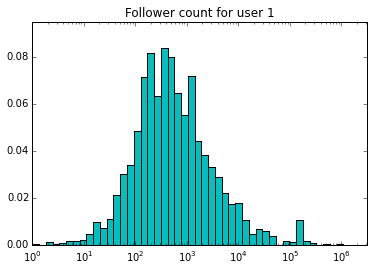

In [5]:
user0FollowCount=convs.followersUser0.dropna().tolist()
bins=np.logspace(0, int(np.log(max(user0FollowCount))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(user0FollowCount,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.095)
plt.title('Follower count for user 1')

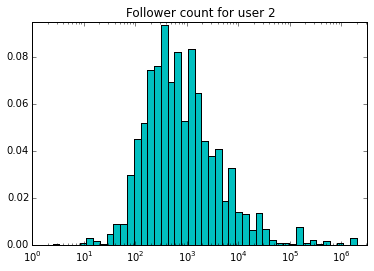

In [6]:
user1FollowCount=convs.followersUser1.dropna().tolist()
bins=np.logspace(0, int(np.log(max(user0FollowCount))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(user1FollowCount,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.095)
plt.title('Follower count for user 2')

* too sparse after user2
* most conversations have 1 or 2 users

In [7]:
np.median(convs.followersUser0.dropna())

451.0

In [8]:
np.median(convs.followersUser1.dropna())

649.0

In [9]:
np.median(convs.followersUser0.dropna().append(convs.followersUser1.dropna()))

526.0

In [71]:
convs['highFollowUser0']=convs.followersUser0.apply(lambda x: 1 if x>500 else 0)

AttributeError: 'DataFrame' object has no attribute 'followersUser0'

In [11]:
sum(convs.highFollowUser0)

2534

In [12]:
convs['highFollowUser1']=convs.followersUser1.apply(lambda x: 1 if x>500 else 0)

In [13]:
sum(convs.highFollowUser1)

2242

In [14]:
convs['highFollowUser2']=convs.followersUser2.apply(lambda x: 1 if x>500 else 0)

In [15]:
sum(convs.highFollowUser2)

50

In [16]:
convs['highFollowUser3']=convs.followersUser3.apply(lambda x: 1 if x>500 else 0)

In [17]:
sum(convs.highFollowUser3)

10

In [18]:
convs['allHighFollowUsers']=convs.highFollowUser0+convs.highFollowUser1+convs.highFollowUser2+convs.highFollowUser3

In [19]:
min(convs.allHighFollowUsers)

0

In [20]:
max(convs.allHighFollowUsers)

4

In [21]:
len(convs[convs.allHighFollowUsers==0])

2064

In [22]:
len(convs[convs.allHighFollowUsers==1])

1778

In [23]:
len(convs[convs.allHighFollowUsers==2])

1489

In [24]:
len(convs[convs.allHighFollowUsers==3])

24

In [25]:
len(convs[convs.allHighFollowUsers==4])

2

In [26]:
2064+1778+1489+24+2

5357

**Group them as such:**
* No high follower users
* One high-follower user
* Two or more high-follower users

In [27]:
NoHighFollow=convs[convs.allHighFollowUsers==0]

In [28]:
OneHighFollow=convs[convs.allHighFollowUsers==1]

In [29]:
ManyHighFollow=convs[convs.allHighFollowUsers>1]

In [30]:
len(NoHighFollow[NoHighFollow.userSetLen==1])/float(len(NoHighFollow))

0.5

In [31]:
len(NoHighFollow[NoHighFollow.userSetLen==2])/float(len(NoHighFollow))

0.49660852713178294

In [32]:
len(NoHighFollow[NoHighFollow.userSetLen>2])/float(len(NoHighFollow))

0.003391472868217054

In [33]:
len(NoHighFollow[NoHighFollow.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.7684288905435592

In [34]:
len(NoHighFollow[NoHighFollow.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.2611464968152866

In [35]:
len(NoHighFollow[NoHighFollow.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.07865168539325842

**Takeway:**
* Conversation with no high-follower users are much more often (50%) one-person conversations than overall (25%)
* And they underrepresent the two-person conversations (50%) compared to overall (73%)

In [36]:
AnyHighFollow=convs[convs.allHighFollowUsers>0]

In [37]:
len(AnyHighFollow[AnyHighFollow.userSetLen==1])/float(len(AnyHighFollow))

0.09444275736410568

In [38]:
len(AnyHighFollow[AnyHighFollow.userSetLen==2])/float(len(AnyHighFollow))

0.8806559368357121

In [39]:
len(AnyHighFollow[AnyHighFollow.userSetLen>2])/float(len(AnyHighFollow))

0.024901305800182204

In [40]:
len(AnyHighFollow[AnyHighFollow.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.2315711094564408

In [41]:
len(AnyHighFollow[AnyHighFollow.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.7388535031847133

In [42]:
len(AnyHighFollow[AnyHighFollow.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.9213483146067416

### Conversation size, duration, and speed for 2 types of high-follower participation

#### None

In [43]:
np.median(NoHighFollow.convSize)

2.0

In [44]:
np.percentile(NoHighFollow.convSize,90)

4.0

In [45]:
np.median(NoHighFollow.convoLen)

509.5

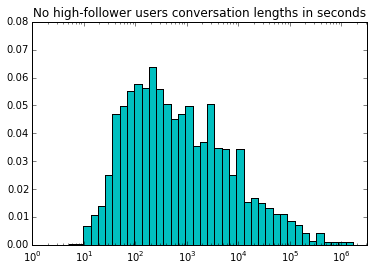

In [46]:
convoLen = NoHighFollow.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('No high-follower users conversation lengths in seconds')

In [47]:
np.median(NoHighFollow.avgTimePerReply)

367.5

In [48]:
np.median(NoHighFollow.medianReplyTime)

321.5

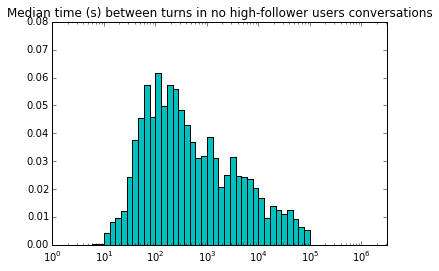

In [49]:
medRepTime=NoHighFollow.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in no high-follower users conversations')

#### Any

In [50]:
np.median(AnyHighFollow.convSize)

2.0

In [51]:
np.percentile(AnyHighFollow.convSize,90)

4.0

In [52]:
np.median(AnyHighFollow.convoLen)

855.0

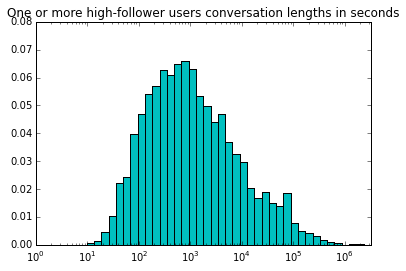

In [53]:
convoLen = AnyHighFollow.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('One or more high-follower users conversation lengths in seconds')

In [54]:
np.median(AnyHighFollow.avgTimePerReply)

550.0

In [55]:
np.median(AnyHighFollow.medianReplyTime)

514.0

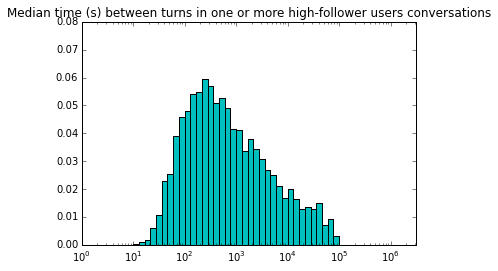

In [56]:
medRepTime=AnyHighFollow.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in one or more high-follower users conversations')

**High-Followers Takeway:**
* Conversations with one or more high-follower users are less frequently one-person conversation
* And more frequently than overall the two-person conversations
* The not high-follower users much more frequently engage in self-conversation
* The one or more high-follower users conversation are quite a bit longer (seconds) then those with no high-follower users
* Meanwhile both types have the same general distribution of steps in the conversation (med=2, 90%=4)
* This means, and is valided by avd and median inter-reply time, which on average (median) is longer in the conversations with some high-follower users
* The non distributions for convoLen and medInterReplyTime are more humpy, with clearer work sessions lognormals, whereas the some distributions are more smooth and long-tailed
* Does this mean that high-follower users slow down the movement of the conversation because the timing of their reply depends less on the timing of the original than on their own tweeting work practices 

### Are high-followers responsible for slowing down the conversation during?

In [57]:
len(NoHighFollow)/float(len(convs))

0.3852902744073175

In [58]:
len(AnyHighFollow)/float(len(convs))

0.6147097255926824

In [59]:
before=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-15 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-10-25 00:00:00'))]

In [60]:
during=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-25 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-04 00:00:00'))]

In [61]:
after=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-04 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-14 00:00:00'))]

In [62]:
lafter=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-14 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-24 00:00:00'))]

In [63]:
len(before[before.allHighFollowUsers>0])/float(len(before))

0.5496932515337424

In [64]:
len(during[during.allHighFollowUsers>0])/float(len(during))

0.6558724021266312

In [65]:
len(after[after.allHighFollowUsers>0])/float(len(after))

0.6137931034482759

In [66]:
len(lafter[lafter.allHighFollowUsers>0])/float(len(lafter))

0.5841170323928945

** SO YES!:**
* There is a higher percentge of conversations with one or more high-follower users During and to slightly leser degree After
* As compared to Before and Long After
* So it seems that the higher presence of high-followers (like celebs and officials) slows down the conversation During
* DO CHI-SQUARE
* In the future, we can test all this with temporal network models that include follower information as node attributes

In [67]:
st.ranksums(NoHighFollow.convoLen, AnyHighFollow.convoLen)

(-7.9577316327961416, 1.7522188792564433e-15)

In [68]:
st.ranksums(NoHighFollow.medianReplyTime, AnyHighFollow.medianReplyTime)

(-7.2213083567682892, 5.1489747475259021e-13)

### By Strong Ties

In [69]:
strongTieUsers=np.loadtxt('../data/strongTieUsers.txt', dtype=str, delimiter=',')

In [70]:
len(strongTieUsers)

955

In [71]:
convs['strongTiesUser0']=convs.convoUser0.apply(lambda x: 1 if x in strongTieUsers else 0)

In [72]:
convs['strongTiesUser1']=convs.convoUser1.apply(lambda x: 1 if x in strongTieUsers else 0)

In [73]:
convs['strongTiesUser2']=convs.convoUser2.apply(lambda x: 1 if x in strongTieUsers else 0)

In [74]:
convs['strongTiesUser3']=convs.convoUser3.apply(lambda x: 1 if x in strongTieUsers else 0)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':


In [75]:
convs['strongTiesAllUsers']=convs.strongTiesUser0+convs.strongTiesUser1+convs.strongTiesUser2+convs.strongTiesUser3

In [76]:
max(convs.strongTiesAllUsers)

4

In [77]:
len(convs[convs.strongTiesAllUsers==0])

1527

In [78]:
len(convs[convs.strongTiesAllUsers==1])

1546

In [79]:
len(convs[convs.strongTiesAllUsers==2])

2246

In [80]:
len(convs[convs.strongTiesAllUsers==3])

36

In [81]:
len(convs[convs.strongTiesAllUsers==4])

2

In [82]:
Out[77]+Out[78]+Out[79]+Out[80]+Out[81]

5357

**Group them as such:**
* No strong tie users
* One strong tie user
* Two strong tie users

In [83]:
len(convs[convs.strongTiesAllUsers==0])/float(len(convs))

0.2850476012693672

In [84]:
len(convs[convs.strongTiesAllUsers==1])/float(len(convs))

0.28859436251633375

In [85]:
len(convs[convs.strongTiesAllUsers>1])/float(len(convs))

0.4263580362142991

**FINDING:**
* Two strong tie user conversations are much more common than say one
* This makes sense - the measure looks for people who reply and are replied to frequently (both sides)
* So it takes two people
* In the future could look specifically for strong tier pairs: by finding high weight high reciprocity edges and see what conversation userSets contain those pairs

In [86]:
noStrongTies=convs[convs.strongTiesAllUsers==0]

In [87]:
oneStrongTies=convs[convs.strongTiesAllUsers==1]

In [88]:
manyStrongTies=convs[convs.strongTiesAllUsers>1]

In [89]:
len(noStrongTies[noStrongTies.userSetLen==1])/float(len(noStrongTies))

0.33857236411263913

In [90]:
len(noStrongTies[noStrongTies.userSetLen==2])/float(len(noStrongTies))

0.6496398166339227

In [91]:
len(noStrongTies[noStrongTies.userSetLen>2])/float(len(noStrongTies))

0.011787819253438114

**Takeway:**
* Conversation with no strong-tie users are much more often (33%) one-person conversations than overall (25%)
* And they underrepresent the two-person conversations (64%) compared to overall (73%)

In [92]:
len(oneStrongTies[oneStrongTies.userSetLen==1])/float(len(oneStrongTies))

0.5342820181112549

In [93]:
len(oneStrongTies[oneStrongTies.userSetLen==2])/float(len(oneStrongTies))

0.45601552393272965

In [94]:
len(oneStrongTies[oneStrongTies.userSetLen>2])/float(len(oneStrongTies))

0.009702457956015523

**Takeway:**
* Conversation with one strong-tie user are more often (53%) one-person conversations than overall (25%)
* But they underrepresent the two-person conversations (45%) compared to overall (73%)
* Since the none and one strong tie convesations show the same trend, should I combine them?

In [95]:
len(manyStrongTies[manyStrongTies.userSetLen==1])/float(len(manyStrongTies))

0.0

In [96]:
len(manyStrongTies[manyStrongTies.userSetLen==2])/float(len(manyStrongTies))

0.9754816112084063

In [97]:
len(manyStrongTies[manyStrongTies.userSetLen>2])/float(len(manyStrongTies))

0.024518388791593695

In [98]:
len(manyStrongTies[manyStrongTies.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.0

In [99]:
len(manyStrongTies[manyStrongTies.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.5676433121019109

In [100]:
len(manyStrongTies[manyStrongTies.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.6292134831460674

**Takeway:**
* Conversation with one or more strong-tie user are never one-person conversations - obviously
* But they are 98% of the time two-person conversations

In [101]:
fewStrongTies=convs[convs.strongTiesAllUsers<2]

In [102]:
len(fewStrongTies[fewStrongTies.userSetLen==1])/float(len(fewStrongTies))

0.43703221607549625

In [103]:
len(fewStrongTies[fewStrongTies.userSetLen==2])/float(len(fewStrongTies))

0.5522290920924179

In [104]:
len(fewStrongTies[fewStrongTies.userSetLen>2])/float(len(fewStrongTies))

0.010738691832085909

In [105]:
len(fewStrongTies[fewStrongTies.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

1.0

In [106]:
len(fewStrongTies[fewStrongTies.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.4323566878980892

In [107]:
len(fewStrongTies[fewStrongTies.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.3707865168539326

### Conversation size, duration, and speed for 2 types of strong-tie participation

#### Few (0 or 1)

In [108]:
np.median(fewStrongTies.convSize)

2.0

In [109]:
np.percentile(fewStrongTies.convSize,90)

3.0

In [110]:
np.median(fewStrongTies.convoLen)

500.0

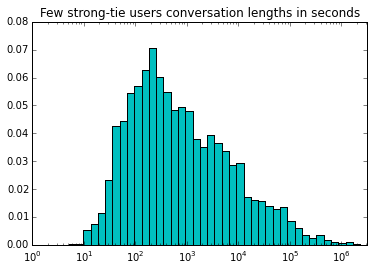

In [111]:
convoLen = fewStrongTies.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Few strong-tie users conversation lengths in seconds')

In [112]:
np.median(fewStrongTies.avgTimePerReply)

436.0

In [113]:
np.median(fewStrongTies.medianReplyTime)

433.0

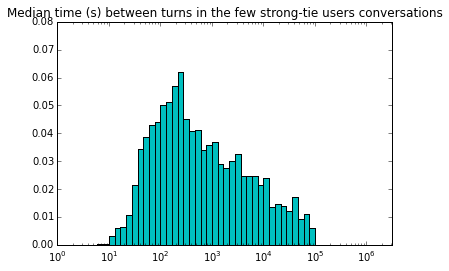

In [231]:
medRepTime=fewStrongTies.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in the few strong-tie users conversations')

#### Many (2 and up)

In [114]:
np.median(manyStrongTies.convSize)

3.0

In [115]:
np.percentile(manyStrongTies.convSize,90)

5.0

In [116]:
np.median(manyStrongTies.convoLen)

1047.5

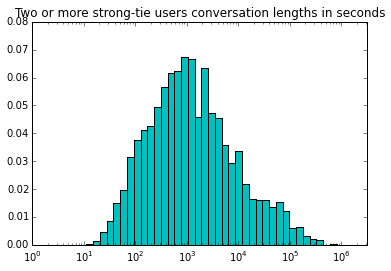

In [117]:
convoLen = manyStrongTies.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Two or more strong-tie users conversation lengths in seconds')

In [118]:
np.median(manyStrongTies.avgTimePerReply)

543.0

In [119]:
np.median(manyStrongTies.medianReplyTime)

454.75

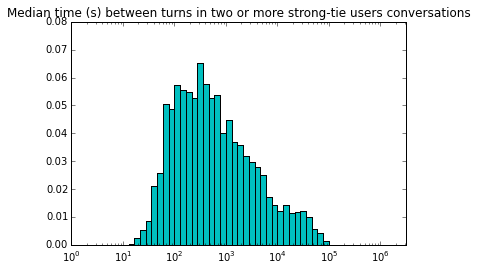

In [120]:
medRepTime=manyStrongTies.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in two or more strong-tie users conversations')

**Strong-Tie Takeway:**
* Conversations with one or less strong-tie users are more frequently one-person conversation (43% vs 25% overall)
* And less frequently than overall the two-person conversations (56% vs 73% overall)
* The two or more strong-tie users conversation have more steps then those with few strong-tie users (med=3, 90%=5)
* Meanwhile, the avg and median inter-reply time for many strong-tie conversations, are on average (median) similar to the few strong-tie conversations
* But this produces longer conversations in the many strong-ties case
* So the strong-tie pairs produce longer conversations because their conversations have more exchages, while the pace is more or less the same
* inter-reply time distribution for few strong-tie conversations is more smooth than for many with less pronounced work session peaks - reply timing depends more on thier own tweeting patterns than on the timing of the original 
* In the conversations with two or more strong-tie people, there are clear work session peaks - users have 3-4 practices of replying to their conversation partners

### Do strong-tie users lengthen the conversations during and long after?

In [121]:
len(fewStrongTies)/float(len(convs))

0.573641963785701

In [122]:
len(manyStrongTies)/float(len(convs))

0.4263580362142991

In [123]:
before=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-15 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-10-25 00:00:00'))]

In [124]:
during=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-25 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-04 00:00:00'))]

In [125]:
after=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-04 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-14 00:00:00'))]

In [126]:
lafter=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-14 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-24 00:00:00'))]

In [127]:
len(before[before.strongTiesAllUsers>1])/float(len(before))

0.4294478527607362

In [128]:
len(during[during.strongTiesAllUsers>1])/float(len(during))

0.4001933301111648

In [129]:
len(after[after.strongTiesAllUsers>1])/float(len(after))

0.4379310344827586

In [130]:
len(lafter[lafter.strongTiesAllUsers>1])/float(len(lafter))

0.46499477533960293

** NO!:**
* No strong difference across time periods
* LOOK INTO THIS - cause if they are not more frequent During
* What makes convos longer during (if that's in fact true - confused now)

In [131]:
st.ranksums(fewStrongTies.convoLen, manyStrongTies.convoLen)

(-10.381875820562142, 2.9982527382007597e-25)

In [132]:
st.ranksums(fewStrongTies.medianReplyTime, manyStrongTies.medianReplyTime)

(-0.42298337291627469, 0.67230739225740388)

In [133]:
convs.to_csv('../data/bbAllFullConvosAW.csv',sep=';')